<a href="https://colab.research.google.com/github/NimaZah/Global-Military-Trends/blob/main/rDMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings

In [4]:
df= pd.read_csv('https://raw.githubusercontent.com/CenterForPeaceAndSecurityStudies/rDMC/main/data/rDMC_raw.csv')


In [9]:
# Print the variables

print(df.columns)

Index(['Unnamed: 0', 'year', 'country', 'service', 'subservice',
       'subsubservice', 'equipment_type', 'equipment_subtype',
       'equipment_name', 'equipment_subname', 'unit_name', 'unit_count',
       'continent', 'ccode', 'domain'],
      dtype='object')


In [ ]:
# 
df['equipment_type'].value_counts()


## What is the most popular type of military equipment?

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

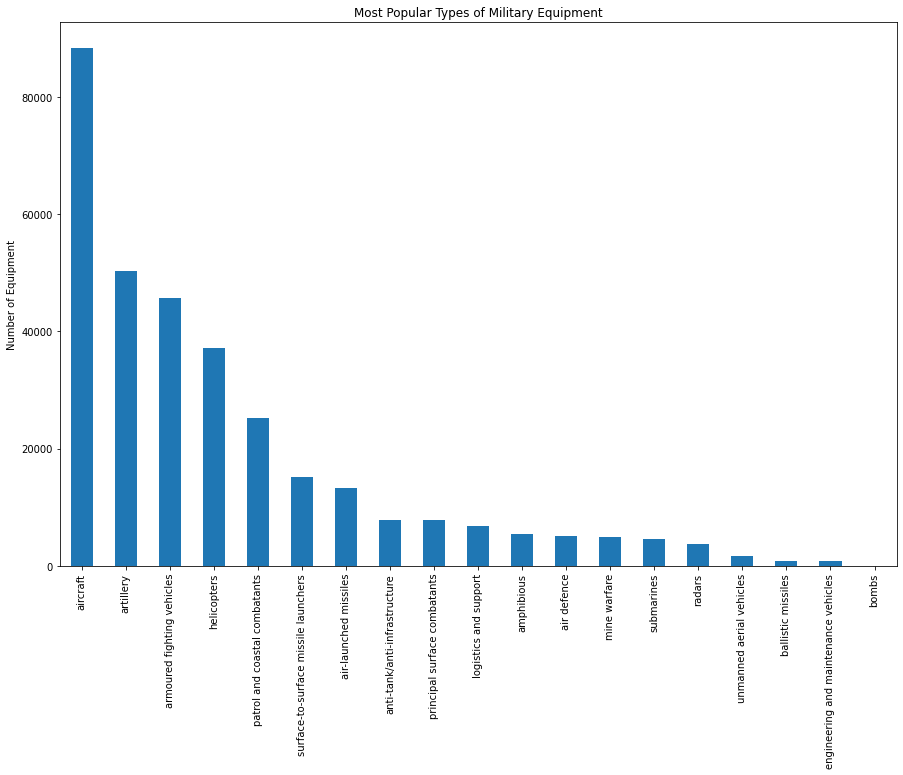

In [32]:
df['equipment_type'].value_counts().plot(kind='bar', figsize=(15,10))
plt.title('Most Popular Types of Military Equipment')
plt.ylabel('Number of Equipment')
plt

## What are the top 10 countries that purchase the most equipment?

In [13]:
df['country'].value_counts().head(10)

us                15950
russia             7330
china              7157
france             6509
india              5744
united kingdom     5323
egypt              5319
thailand           5293
argentina          5288
iran               5109
Name: country, dtype: int64

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

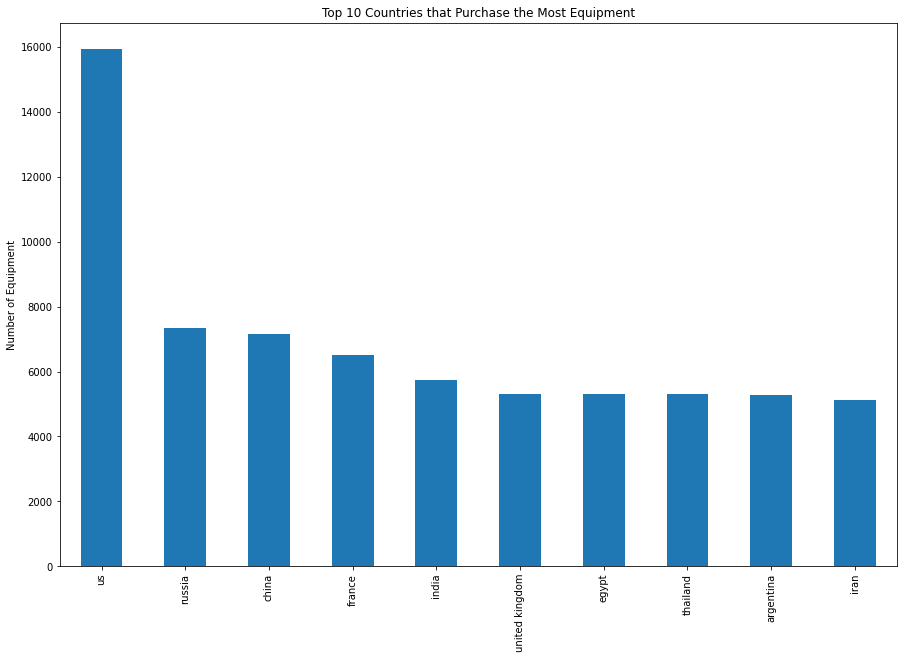

In [34]:
df['country'].value_counts().head(10).plot(kind='bar', figsize=(15,10))
plt.title('Top 10 Countries that Purchase the Most Equipment')
plt.ylabel('Number of Equipment')
plt

## What are the top 10 countries that purchase the least equipment?

In [20]:
df['country'].value_counts().tail(10)

luxembourg                 90
rumania                    76
barbados                   63
somalia                    56
antigua and barbuda        55
gambia                     50
south sudan                35
timor leste                15
liberia                     9
palestinian territories     5
Name: country, dtype: int64

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

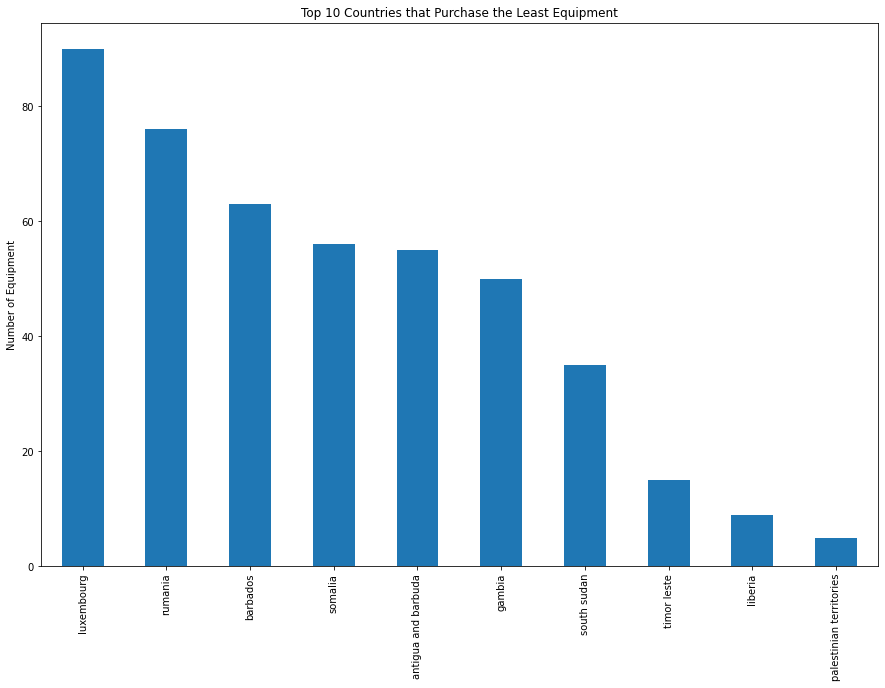

In [35]:
df['country'].value_counts().tail(10).plot(kind='bar', figsize = (15,10))
plt.title('Top 10 Countries that Purchase the Least Equipment')
plt.ylabel('Number of Equipment')
plt

## What are the most popular types of military equipments in Asia, Africa, Eripe, and the US?

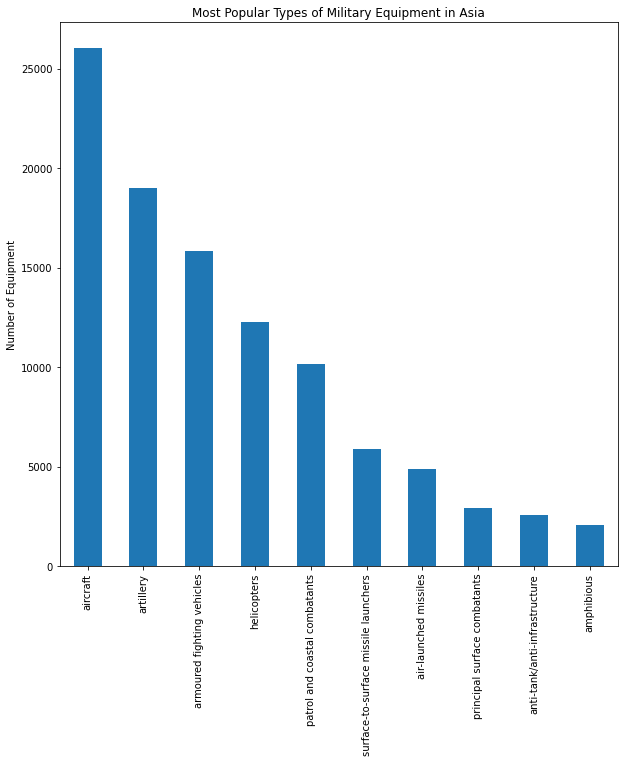

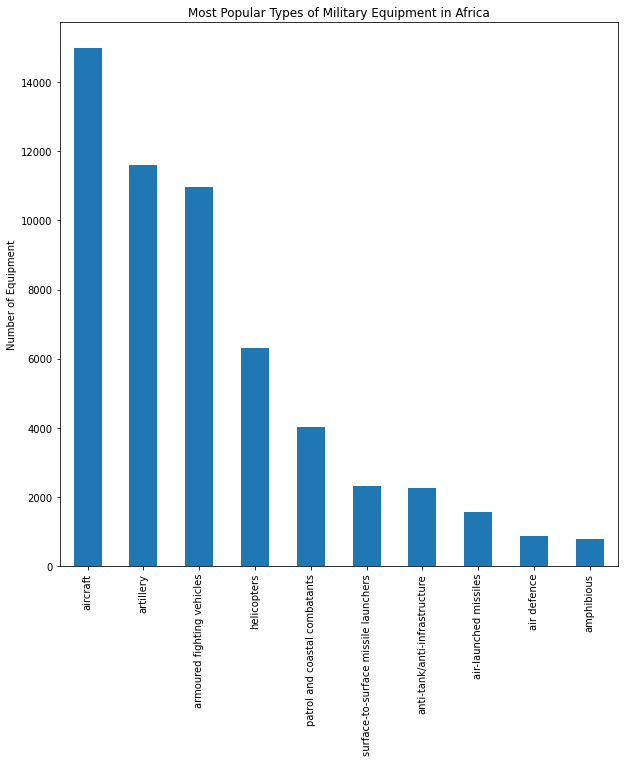

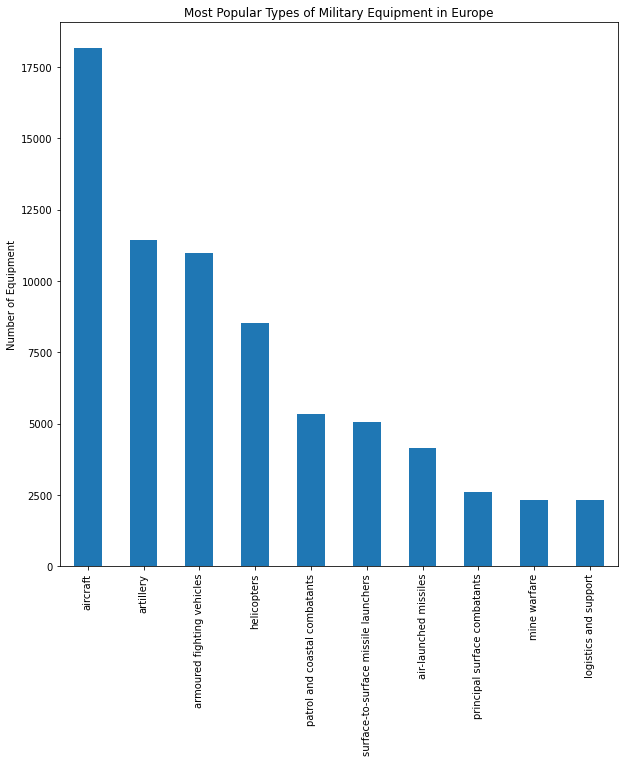

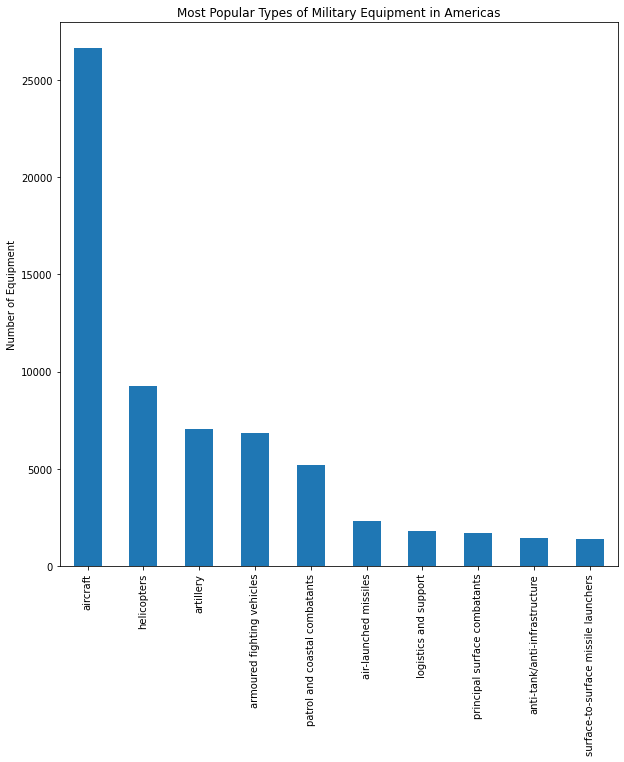

In [40]:
df[df['continent'] == 'Asia']['equipment_type'].value_counts().head(10).plot(kind='bar', figsize = (10,10))
plt.title('Most Popular Types of Military Equipment in Asia')
plt.ylabel('Number of Equipment')
plt.show()
df[df['continent'] == 'Africa']['equipment_type'].value_counts().head(10).plot(kind='bar', figsize = (10,10))
plt.title('Most Popular Types of Military Equipment in Africa')
plt.ylabel('Number of Equipment')
plt.show()
df[df['continent'] == 'Europe']['equipment_type'].value_counts().head(10).plot(kind='bar', figsize=(10,10))
plt.title('Most Popular Types of Military Equipment in Europe')
plt.ylabel('Number of Equipment')
plt.show()
df[df['continent'] == 'Americas']['equipment_type'].value_counts().head(10).plot(kind='bar', figsize=(10,10))
plt.title('Most Popular Types of Military Equipment in Americas')
plt.ylabel('Number of Equipment')
plt.show()

## How many countries have purchased equipment in the last 10 years?

In [20]:
print(df[df['year']>=2008]['country'].nunique())

171


## Has the global purchase of military equipment increased or decreased over time? 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

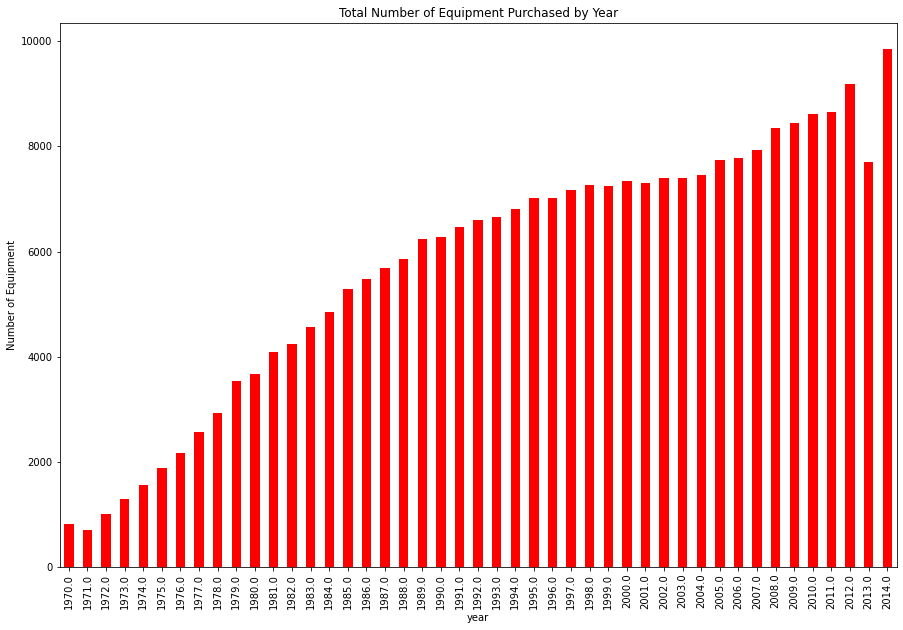

In [43]:
# First, we create a new column that excludes 2015, 2016, and 2017, since we don't have enough data to cover them.
df_new_year = df[df['year'] < 2015]

# We group the data by year and sum the total number of equipments for each year.
df_new_year.groupby('year')['unit_count'].count()

# Visualize the total number of equipments per year
df_new_year.groupby('year')['unit_count'].count().plot(kind='bar', color='red', figsize=(15,10))
plt.title('Total Number of Equipment Purchased by Year')
plt.ylabel('Number of Equipment')
plt

## What are the most popular type of military equipment in the last 10 years?

In [21]:
print(df[df['year']>=2008]['equipment_type'].value_counts())

aircraft                                16432
artillery                               11186
armoured fighting vehicles              10625
helicopters                              8686
patrol and coastal combatants            7127
surface-to-surface missile launchers     4126
air-launched missiles                    3554
logistics and support                    3430
anti-tank/anti-infrastructure            1736
amphibious                               1544
air defence                              1480
principal surface combatants             1380
radars                                   1283
unmanned aerial vehicles                  939
mine warfare                              891
submarines                                839
engineering and maintenance vehicles      801
ballistic missiles                        221
bombs                                      31
Name: equipment_type, dtype: int64


## On the global scale, what is the share of China in purchasing military equipments during the last 10 years?

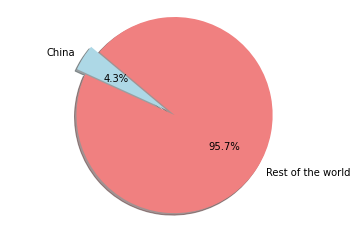

In [47]:

df_2018 = df[df['year'] == 2000]
df_2018.head()
df_2018_china = df_2018[df_2018['country'] == 'china']
df_2018_china.head()
df_2018_rest = df_2018[df_2018['country'] != 'china']
df_2018_rest.head()
df_2018_china['unit_count'].sum()
df_2018_rest['unit_count'].sum()
df_2018_china['unit_count'].sum() / df_2018['unit_count'].sum()
df_2018_rest['unit_count'].sum() / df_2018['unit_count'].sum()
df_2018_china['unit_count'].sum() / df_2018_rest['unit_count'].sum()
df_2018_china['unit_count'].sum() / df_2018_rest['unit_count'].sum() * 100
df_2018_rest['unit_count'].sum() / df_2018_china['unit_count'].sum()
df_2018_rest['unit_count'].sum() / df_2018_china['unit_count'].sum() * 100
import matplotlib.pyplot as plt

labels = ['China', 'Rest of the world']
sizes = [df_2018_china['unit_count'].sum(), df_2018_rest['unit_count'].sum()]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

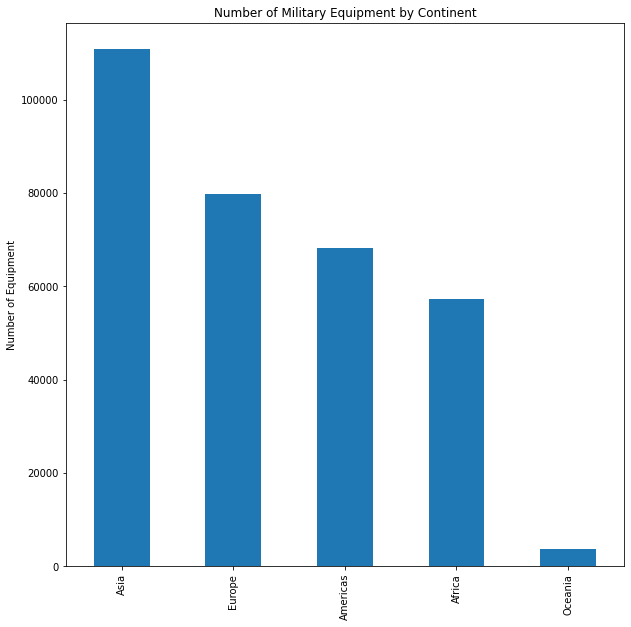

In [51]:
# Which continents have purchased more military equipment over the last decade?

df['continent'].value_counts().head(10).plot(kind='bar', figsize= (10,10))
plt.title('Number of Military Equipment by Continent')
plt.ylabel('Number of Equipment')
plt

## What does the military map of the world look like

In [57]:
!pip install chart-studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

data = dict(type='choropleth',
            locations = df_country_count['country'],
            locationmode = 'country names',
            z = df_country_count['count'],
            text = df_country_count['country'],
            colorbar = {'title':'Equipment Count'})

layout = dict(title = 'Number of Equipment Purchased by Country',
              geo = dict(showframe = False,
                         projection = {'type': 'mercator'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

     |████████████████████████████████| 64 kB 1.7 MB/s 


In [61]:
import plotly.express as px
fig = px.scatter(df_country_count, x='country_count', y='country', size='count', color='country',
           hover_name='country', log_x=True, size_max=60)
fig.update_layout(title='Number of Equipment Types Purchased by Country',
                  xaxis_title='Number of Equipment Types',
                  yaxis_title='Country')
fig.update_traces(textposition='top center')
fig.show()

## How does the equipment type vary by country? (among top 20 countries that purchase the most equipments)

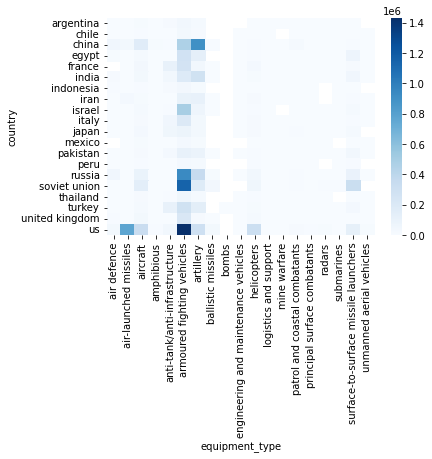

In [64]:
# To answer this question, we will use a heatmap.
# First, we will select top 20 countries that purchase the most equipment.
top_countries = df['country'].value_counts().head(20).index

# Next, we will create a pivot table with the country names as the index and the equipment types as the columns.
# The values will be the counts of each equipment type.

pivot = df[df['country'].isin(top_countries)].pivot_table(index='country', columns='equipment_type', values='unit_count', aggfunc='sum')
import plotly.graph_objects as go

sns.heatmap(pivot, cmap='Blues')

# How does the service branches vary by country? (among top 20 countries that purchase the most equipments)

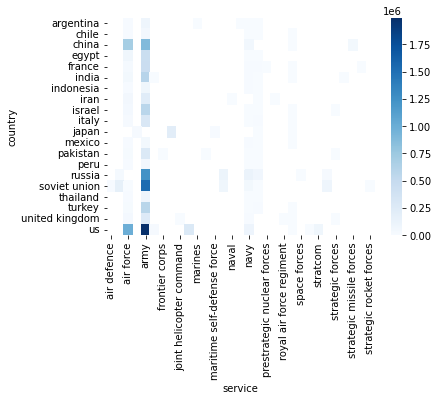

In [70]:
pivot = df[df['country'].isin(top_countries)].pivot_table(index='country', columns='service', values='unit_count', aggfunc='sum')
sns.heatmap(pivot, cmap='Blues')

## What is canada  military capabilities campared to Global average?

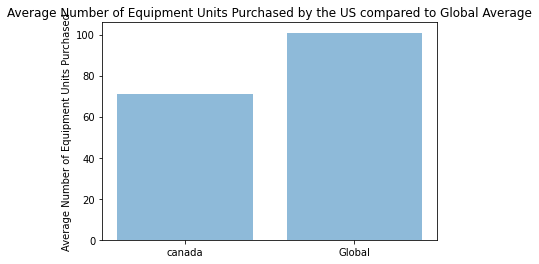

In [80]:
# What is canada  military capabilities campared to Global average? To answer this question, I will use a bar chart to compare the average number of equipment units purchased by countries in canada compared to the global average.
# 
# First, I  create a new dataframe that contains the average number of units in canada.
# Next, I create a new dataframe that contains the average number of  units in the rest of the world.

ca_df = df[df['country']=='canada']
ca_df.head()

# Next, to obtain the avarage for the rest of the world, I  create a new dataframe that contains the average number of  units in the rest of the world.

world_df = df[df['country']!='canada']
world_df.head()

# I calculate the average number of units in canada and the rest of the world

ca_mean = ca_df['unit_count'].mean()
rest_mean = world_df['unit_count'].mean()

# Finally, I Visualize the average number of Canadian equipment units compared to the global average.

objects = ('canada', 'Global')
y_pos = np.arange(len(objects))
performance = [ca_mean, rest_mean]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Number of Equipment Units Purchased')
plt.title('Average Number of Equipment Units Purchased by the US compared to Global Average')

plt.show()



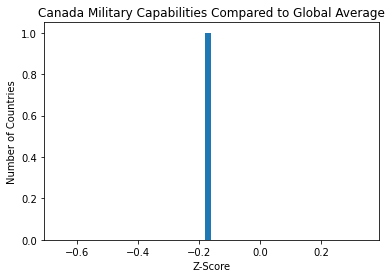

In [83]:
ca_z = (ca_mean - rest_mean) / ca_df['unit_count'].std()
ca_z
plt.hist(ca_z, bins=50)
plt.title('Canada Military Capabilities Compared to Global Average')
plt.xlabel('Z-Score')
plt.ylabel('Number of Countries')
plt.show()

In [76]:
# Save the dataframe to csv and downloaded it from colab to the local machine
df.to_csv('ERT.csv')
from google.colab import files
files.download('ERT.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>